# How valuable is Derrick Henry to the Titan's offense?
Derrick Henry is one of the most prolific running backs over the last years. He is a monstrous back running through defenders (just ask Josh Norman) with 1059 yards in 2018, 1540 yards in 2019 and a ridiculous 2027 yards in 2020.
So it's is clear to say that he is an exceptional player, but how valuable is he really for this Titan's run heavy offense? 
In Week 8 of the 2021 season again the Indianapolis Colts Henry broke his foot and was ruled out for the rest of the regular season. Many believed this was the downfall of the Tenessee Titans and the hope for another playoff run was over. But the Titans finished with a 12-5 record and went to the playoffs as first seed.
So let's have a look how valuable Henry really is to this offense ...

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pathlib

# Build path
this_path = pathlib.Path().resolve()
# define playing weeks
game_weeks = list(range(1,19))
game_weeks.remove(13)

## Rushing Yards Per Game
First let's have a look at the rushing yards per game of weeks 1 - 8 vs weeks 9 - 18.
Games where Henry has played in have less variance in rushing yards and a higher mean (147 yds against 137 yds) as well as median (161.5 yds against 102.5 yds).
This means Games with Henry averaged a higher rushing performance by 10 yds. Interestingly, the mean for the games without Henry is highly inflated by the game against the new England Patriots in week 12 with a total of 270 rushing yards.

([<matplotlib.axis.XTick at 0x201825c4f40>,
 [Text(1, 0, 'Week 1 - 8'), Text(2, 0, 'Week 9 - 17')])

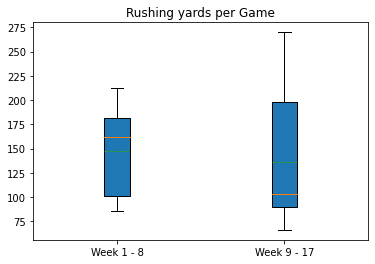

In [198]:
fig, ax = plt.subplots()
df_henry = df["Off_RushY"][0:8]
df_other = df["Off_RushY"][8:17]
ax.set_title("Rushing yards per Game")
ax.boxplot([df_henry, df_other], meanline= True, showmeans = True, patch_artist=True )
plt.xticks([1, 2], ['Week 1 - 8', 'Week 9 - 17'])

## Rushing yards per Game per Player
So let's have a look at the rushing yards per Game per player. And here we can clearly see the aforementioned Patriots game.
We can also see the huge after Henry's injury for the following games. But after a while the other RBs have replaced Henry as 3 punch offense between Foreman, Hilliard and McNichols.

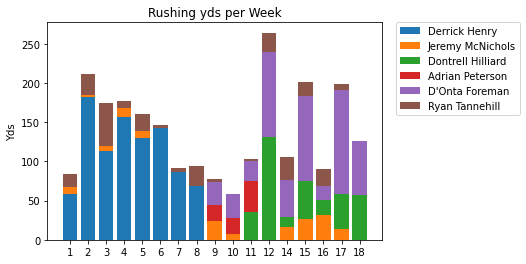

In [161]:
# Lets look at the rushing yds over the season

rush_path = this_path / "data" / "rushing.csv"
df_rush = pd.read_csv(rush_path)
df_rush = df_rush[["Player","Week","Yds"]]
players = set(df_rush["Player"].values)
dict = {}
for player in players:
    dict[player] = []
    for week in game_weeks:
        if df_rush[(df_rush["Player"]==player) & (df_rush["Week"]== week)]["Yds"].empty:
            dict[player].append(0)
        elif df_rush[(df_rush["Player"]==player) & (df_rush["Week"]== week)]["Yds"].values[0]<1:
            dict[player].append(0)
        else:
            yds = df_rush[(df_rush["Player"]==player) & (df_rush["Week"]== week)]["Yds"].values[0]
            dict[player].append(yds)
labels = list(map(str,  game_weeks))
fig, ax = plt.subplots()
prev = 0
for player, yds in dict.items():
    if sum(yds)>20:
        ax.bar(labels, yds, label=player, bottom=prev)
        prev = np.add(prev,yds)
ax.set_ylabel('Yds')
ax.set_title('Rushing yds per Week')
ax.legend()
# plt.xticks(game_weeks)
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show()




## Rushing attempts per Game per Player
Many had the fear, the Titans could not keep up the rushing workload without Henry, but splitting the rushes onto their 3 main RBs, their rushing attempts per game were stable.

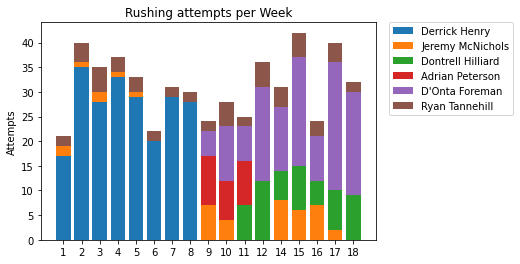

In [162]:
rush_path = this_path / "data" / "rushing.csv"
df_rush = pd.read_csv(rush_path)
df_rush = df_rush[["Player","Week","Att"]]
players = set(df_rush["Player"].values)
dict = {}
for player in players:
    dict[player] = []
    for week in game_weeks:
        if df_rush[(df_rush["Player"]==player) & (df_rush["Week"]== week)]["Att"].empty:
            dict[player].append(0)
        else:
            att = df_rush[(df_rush["Player"]==player) & (df_rush["Week"]== week)]["Att"].values[0]
            dict[player].append(att)
prev = 0
labels = labels = list(map(str,  game_weeks))
fig, ax = plt.subplots()
for player, att in dict.items():
    if sum(att)>10:
        ax.bar(labels, att, label=player, bottom=prev)
        prev = np.add(prev,att)
ax.set_ylabel('Attempts')
ax.set_title('Rushing attempts per Week')
ax.legend()
# plt.xticks(game_weeks)
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show()


## 1st Downs
Henry was also a crucial part of the Titan's gameplan at 1st down conversions. And again we see a slight dip in 1st down conversions after Henry's injury, but overall the Titans remained a solid 1st down rushing offense.

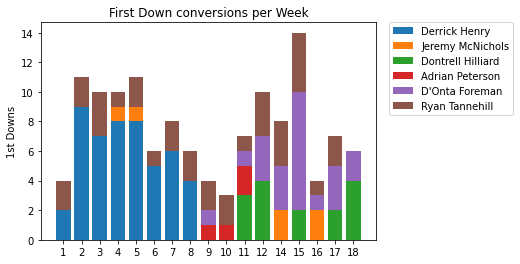

In [174]:
rush_path = this_path / "data" / "rushing.csv"
df_rush = pd.read_csv(rush_path)
df_rush = df_rush[["Player","Week","1D"]]
players = set(df_rush["Player"].values)
dict = {}
for player in players:
    dict[player] = []
    for week in game_weeks:
        if df_rush[(df_rush["Player"]==player) & (df_rush["Week"]== week)]["1D"].empty:
            dict[player].append(0)
        elif np.isnan(df_rush[(df_rush["Player"]==player) & (df_rush["Week"]== week)]["1D"].values[0]):
            dict[player].append(0)
        else:
            firstdowns = df_rush[(df_rush["Player"]==player) & (df_rush["Week"]== week)]["1D"].values[0]
            dict[player].append(firstdowns)
prev = 0
labels = labels = list(map(str,  game_weeks))
fig, ax = plt.subplots()
for player, firstdowns in dict.items():
    if sum(firstdowns)>2:
        ax.bar(labels, firstdowns, label=player, bottom=prev)
        prev = np.add(prev,firstdowns)
ax.set_ylabel('1st Downs')
ax.set_title('First Down conversions per Week')
ax.legend()
# plt.xticks(game_weeks)
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show()

## Passing vs Rushing attempts per Game
It's also impressing that the Titans did not change their offensive philosophy without their lead back and maintained a healthy split between rushing (51%) and passing (49%).

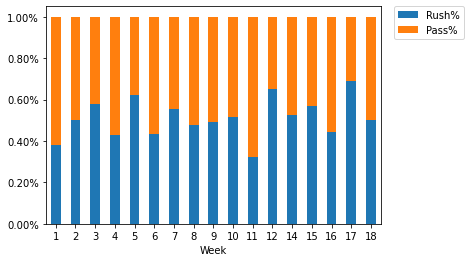

In [203]:
# Now let's have a look about the passing vs rushing per game
import matplotlib.ticker as mtick
data_path = this_path / "data" / "offense.csv"
offense = pd.read_csv(data_path, delimiter=",")[["Week","Passing_Att", "Rushing_Att"]]
offense = offense.groupby(["Week"]).sum()
offense["Pass%"] = offense["Passing_Att"]/(offense["Passing_Att"] + offense["Rushing_Att"])
offense["Rush%"] = offense["Rushing_Att"]/(offense["Passing_Att"] + offense["Rushing_Att"])
ax = offense[["Rush%","Pass%"]].plot.bar(stacked=True, rot=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)


## Rushing TDs per Game
The only metric you could really miss Derrick Henry's production is the rushing touchdowns. Here you can see how effective Henry was in the red zone, and how his absence influenced their scoring.

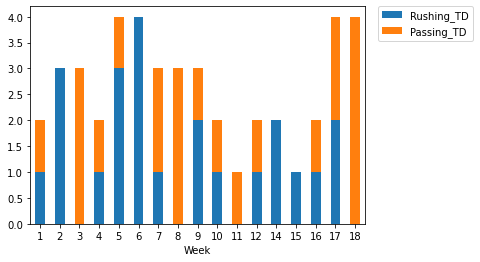

In [181]:
# Now lets have a look at the TDs made
data_path = this_path / "data" / "offense.csv"
offense = pd.read_csv(data_path, delimiter=",")[["Week","Passing_TD", "Rushing_TD"]]
offense = offense.groupby(["Week"]).sum()
ax = offense[["Rushing_TD","Passing_TD"]].plot.bar(stacked=True, rot=0)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

## Passer Rating
It seems like it took Tannehill and the rest of the passing offense to adjust to playing without Henry but the further the season progressed the better Tannehill's passer rating got.

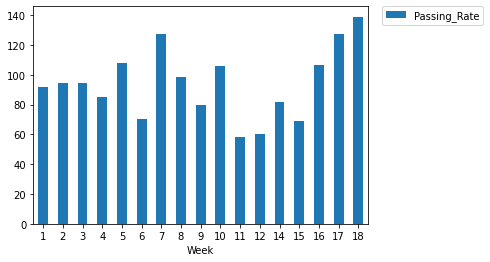

In [189]:
# And the passer rating?
data_path = this_path / "data" / "offense.csv"
offense = pd.read_csv(data_path, delimiter=",")[["Week","Passing_Rate"]]
offense = offense.groupby(["Week"]).max()
ax = offense["Passing_Rate"].plot.bar(stacked=True, rot=0)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

## How it all connects
And last but not least we are going to have a look at the correlation matrix between most of the metrics used in this analysis.
I left all the correlations in here to give a full overview, but will focus on the bottom row as it shows how the absence of Henry correlates with other metrics.
We can see that almost every metric at least slighty correlates with Henry being on the field. 
Especially the points per Game by the Titans (Score_Tm) and the rest of the offense benefitted from Henry being there.
It's also interesting that the offensive turnovers (Off_To) negatively correlates with Henry, meaning the offense had more effective drives with henry on the field and thus could score more points.

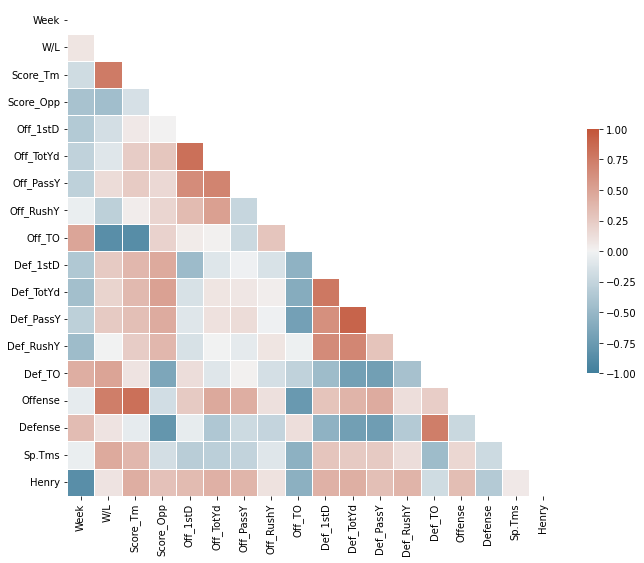

In [204]:

data_path = this_path / "data" / "game_results_2021.csv"
# Define Columns
columns = ["Week","Day","Date","Time", "Boxscore", "W/L","OT","Rec","Home","Opp","Score_Tm","Score_Opp","Off_1stD","Off_TotYd","Off_PassY","Off_RushY","Off_TO","Def_1stD", "Def_TotYd","Def_PassY","Def_RushY","Def_TO","Offense","Defense","Sp.Tms"]

# Read CSV with new headers
df = pd.read_csv(data_path, delimiter=",", skiprows=2, names=columns)
# Add Column if Henry has played or not
df["Henry"] = df.apply(lambda row: 1 if row.Week <=8 else 0, axis=1)
df["W/L"] = df.apply(lambda row: 1 if row["W/L"] == "W" else 0, axis=1)
# Drop bye week
df = df.drop(index=12)

# Select all numerical columns
num_df = df.select_dtypes(include=np.number)
corr = num_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("heatmap.png")

## Rushing yards per Dollar
Last but not least there is the big question, how much are the RBs worth in terms of money.
Here we see the Rushing yards per Game on the Y-Axis against the Average Salary per Game in $ on the X-Axis. The Average Salary per Game is calculated by the average per year salary from [overthecap.com](https://overthecap.com/position/running-back/) divided by the amount of games of the season. To make the graph more readable, the x-axis is on a logarithmic scale, so be careful with that.
Henry is in the 2021 season in the very top right corner, meaning he is one of the best earning RBs of the league but also THE best when it comes to Yards/Game (keep in mind, that his injured games do not count for this statistic)

Note: for the interactive graph you have to run the Notebook yourself, otherwise open the image in a new tab to zoom in and out

In [2]:
# Let#'s try it more fancy
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

data_path = this_path / "data" / "rb_combined.csv"
rbs_combined = pd.read_csv(data_path, delimiter=",")

rbs_combined["Yds/Game"] = rbs_combined["Yds"] / rbs_combined["G"]
rbs_combined["Salary/Game"] = rbs_combined["Avg./Year"] / len(game_weeks)

fig = px.scatter(rbs_combined, x="Salary/Game",y="Yds/Game", text="Player", log_x=True, size_max=100, hover_data={'Yds/Game':':.2f', 'Salary/Game':':$,.2f'})#, color="lifeExp")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='NFL Running Backs', title_x=0.5)
fig.update_xaxes(title_text='Salary/Game in $')
fig.update_yaxes(title_text='Rushing Yds/Game')
fig.show()

![NFL Runnning Backs](./NFL_Running_Backs.svg)

In [5]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# fig.show('svg')
iplot(fig, image='svg', filename='NFL_Running_Backs.svg', image_width=2560, image_height=1280)

In [3]:
from IPython.display import IFrame
source = 'https://github.com/simonhuber95/Titans-Analysis/blob/main/NFL_Running_Backs.html'
IFrame(src=source, width=700, height=600)

